In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

X_train = train.drop(['High Income'], axis=1)
y_train = train['High Income']

X_test = test.drop(['High Income'], axis=1)
y_test = test['High Income']

### Calculate train/test accuracy with varied K

In [3]:
k_values = [1, 2, 3, 4, 5, 10, 15, 20, 30, 32]
train_accuracy = []
test_accuracy = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    ##test2['label_'+str(k)] = knn.predict(X_test)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

In [4]:
print(train_accuracy)

[1.0, 0.96875, 0.9375, 0.96875, 0.9375, 0.84375, 0.84375, 0.90625, 0.90625, 0.5]


In [5]:
print(test_accuracy)

[0.875, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5]


### Plot for sanity check

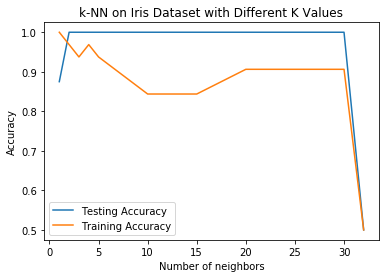

In [6]:
plt.title('k-NN on Iris Dataset with Different K Values')
plt.plot(k_values, test_accuracy, label='Testing Accuracy')
plt.plot(k_values, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

### Write into a CSV to use 

In [7]:
accuracies_tr = pd.DataFrame({"k": k_values, "accuracy": train_accuracy})
accuracies_tr['type'] = 'train'

accuracies_te = pd.DataFrame({"k": k_values, "accuracy": test_accuracy})
accuracies_te['type'] = 'test'

In [8]:
accuracies = pd.concat([accuracies_tr, accuracies_te])
accuracies.to_csv('KNN_Accuracies.csv', index = False)

$$min_{m, b} \sum_{x_i \in points} (y_i - (m\cdot x_i - b))^2$$